Mounted at /content/drive
⚙️ Using device: cpu
📦 Total images found: 1107 across 10 classes: ['Fuchka', 'Kalavuna', 'Kichuri', 'Mango Pudding', 'Misty', 'Muri Canacur', 'Pitha', 'Pizza', 'Puri', 'Rosmalai']
🟢 Training images: 885
📊 Training split distribution:
   📁 Fuchka: 111 images
   📁 Kalavuna: 16 images
   📁 Kichuri: 134 images
   📁 Mango Pudding: 14 images
   📁 Misty: 287 images
   📁 Muri Canacur: 149 images
   📁 Pitha: 19 images
   📁 Pizza: 27 images
   📁 Puri: 117 images
   📁 Rosmalai: 11 images

🔵 Validation images: 222
📊 Validation split distribution:
   📁 Fuchka: 18 images
   📁 Kalavuna: 5 images
   📁 Kichuri: 37 images
   📁 Mango Pudding: 0 images
   📁 Misty: 74 images
   📁 Muri Canacur: 43 images
   📁 Pitha: 6 images
   📁 Pizza: 8 images
   📁 Puri: 27 images
   📁 Rosmalai: 4 images



Downloading: "https://download.pytorch.org/models/vgg19_bn-c79401a0.pth" to /root/.cache/torch/hub/checkpoints/vgg19_bn-c79401a0.pth
100%|██████████| 548M/548M [00:03<00:00, 147MB/s]
Epoch 1/10 - Training: 100%|██████████| 28/28 [13:13<00:00, 28.34s/it]


Epoch 1: Train Acc = 37.63%, Val Acc = 41.89%


Epoch 2/10 - Training: 100%|██████████| 28/28 [13:07<00:00, 28.12s/it]


Epoch 2: Train Acc = 63.05%, Val Acc = 86.04%


Epoch 3/10 - Training: 100%|██████████| 28/28 [13:34<00:00, 29.09s/it]


Epoch 3: Train Acc = 85.88%, Val Acc = 88.74%


Epoch 4/10 - Training: 100%|██████████| 28/28 [13:26<00:00, 28.79s/it]


Epoch 4: Train Acc = 88.14%, Val Acc = 89.19%


Epoch 5/10 - Training: 100%|██████████| 28/28 [12:43<00:00, 27.28s/it]


Epoch 5: Train Acc = 88.59%, Val Acc = 88.74%


Epoch 6/10 - Training: 100%|██████████| 28/28 [12:46<00:00, 27.39s/it]


Epoch 6: Train Acc = 89.60%, Val Acc = 91.44%


Epoch 7/10 - Training: 100%|██████████| 28/28 [12:44<00:00, 27.29s/it]


Epoch 7: Train Acc = 92.77%, Val Acc = 92.79%


Epoch 8/10 - Training: 100%|██████████| 28/28 [12:47<00:00, 27.40s/it]


Epoch 8: Train Acc = 96.05%, Val Acc = 95.95%


Epoch 9/10 - Training: 100%|██████████| 28/28 [13:08<00:00, 28.16s/it]


Epoch 9: Train Acc = 96.84%, Val Acc = 96.85%


Epoch 10/10 - Training: 100%|██████████| 28/28 [12:43<00:00, 27.28s/it]


Epoch 10: Train Acc = 98.64%, Val Acc = 98.65%
✅ Model saved at: /content/drive/MyDrive/Dataset/Dataset/Samifood_model_vgg.pth


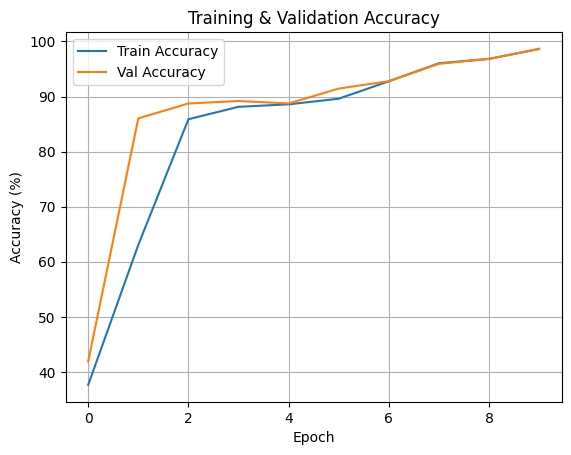

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(



📊 Validation Metrics:
Accuracy: 0.9865
Precision: 0.9872
Recall: 0.9865
Confusion Matrix:
[[18  0  0  0  0  0  0  0  0]
 [ 0  5  0  0  0  0  0  0  0]
 [ 0  0 37  0  0  0  0  0  0]
 [ 0  0  0 74  0  0  0  0  0]
 [ 0  0  0  0 43  0  0  0  0]
 [ 0  0  0  1  0  4  0  1  0]
 [ 0  0  0  0  0  0  8  0  0]
 [ 0  0  0  0  0  0  0 27  0]
 [ 0  0  0  0  0  0  1  0  3]]
ROC AUC: 0.9999


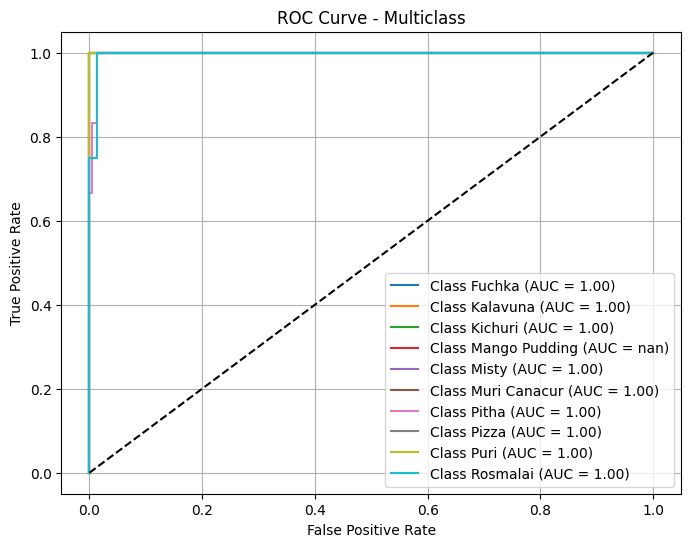

🔎 Prediction for 'IMG20250608133835.jpg': Mango Pudding


In [ ]:
# ✅ Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# ✅ Imports
import os
import time
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, random_split
from tqdm import tqdm
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    confusion_matrix, roc_auc_score, roc_curve
)
import numpy as np
from collections import Counter

# ✅ Count and print number of images per class
def count_labels(dataset, class_names, split_name=""):
    labels = [sample[1] for sample in dataset]
    label_counts = Counter(labels)
    print(f"\U0001F4CA {split_name} split distribution:")
    for idx in range(len(class_names)):
        print(f"   \U0001F4C1 {class_names[idx]}: {label_counts[idx]} images")
    print()

# ✅ Load dataset
def load_food_dataset(base_path, img_size=224, batch_size=32, split_ratio=0.8):
    transform = transforms.Compose([
        transforms.Resize((img_size, img_size)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ])

    full_dataset = datasets.ImageFolder(root=base_path, transform=transform)
    class_names = full_dataset.classes
    total_images = len(full_dataset)
    print(f"\U0001F4E6 Total images found: {total_images} across {len(class_names)} classes: {class_names}")

    train_size = int(split_ratio * total_images)
    val_size = total_images - train_size
    train_set, val_set = random_split(full_dataset, [train_size, val_size])

    print(f"\U0001F7E2 Training images: {len(train_set)}")
    count_labels(train_set, class_names, split_name="Training")

    print(f"\U0001F535 Validation images: {len(val_set)}")
    count_labels(val_set, class_names, split_name="Validation")

    train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_set, batch_size=batch_size, shuffle=False)

    return train_loader, val_loader, class_names

# ✅ Simple CNN
class SimpleCNN(nn.Module):
    def __init__(self, num_classes):
        super(SimpleCNN, self).__init__()
        self.net = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1), nn.ReLU(), nn.MaxPool2d(2),
            nn.Conv2d(32, 64, kernel_size=3, padding=1), nn.ReLU(), nn.MaxPool2d(2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1), nn.ReLU(), nn.MaxPool2d(2),
            nn.Flatten(),
            nn.Linear(128 * 28 * 28, 256), nn.ReLU(),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        return self.net(x)

# ✅ Combined VGG19 + SimpleCNN refinement model
class VGG19_SimpleCNN(nn.Module):
    def __init__(self, num_classes, pretrained=True, feature_extract=True):
        super().__init__()
        vgg = models.vgg19_bn(weights=models.VGG19_BN_Weights.DEFAULT if pretrained else None)
        self.features = vgg.features
        if feature_extract:
            for p in self.features.parameters():
                p.requires_grad = False

        self.refine = nn.Sequential(
            nn.Conv2d(512, 256, kernel_size=3, padding=1), nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(256, 128, kernel_size=3, padding=1), nn.ReLU(),
            nn.AdaptiveAvgPool2d((1, 1)),
            nn.Flatten(),
            nn.Linear(128, 256), nn.ReLU(),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.refine(x)
        return x

# ✅ Get model
def get_model(model_name, num_classes, device, pretrained=True, feature_extract=True):
    model_name = model_name.lower()
    if model_name == "simple":
        model = SimpleCNN(num_classes)
    elif model_name == "vgg19":
        model = models.vgg19_bn(weights=models.VGG19_BN_Weights.DEFAULT if pretrained else None)
        if feature_extract:
            for p in model.features.parameters():
                p.requires_grad = False
        model.classifier[6] = nn.Linear(model.classifier[6].in_features, num_classes)
    elif model_name in {"combo", "vgg19+simple"}:
        model = VGG19_SimpleCNN(num_classes, pretrained, feature_extract)
    else:
        raise ValueError("Unknown model_name")
    return model.to(device)

# ✅ Train model

def evaluate_model(model, val_loader, device):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)
    return 100. * correct / total


def train_model(model, train_loader, val_loader, device, epochs=4, lr=0.001, save_path='model.pth'):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    train_acc_list, val_acc_list = [], []
    start_time = time.time()

    for epoch in range(epochs):
        model.train()
        correct, total, train_loss = 0, 0, 0.0
        for images, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs} - Training"):
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item() * images.size(0)
            _, predicted = outputs.max(1)
            correct += predicted.eq(labels).sum().item()
            total += labels.size(0)

        train_acc = 100. * correct / total
        val_acc = evaluate_model(model, val_loader, device)
        train_acc_list.append(train_acc)
        val_acc_list.append(val_acc)
        print(f"Epoch {epoch+1}: Train Acc = {train_acc:.2f}%, Val Acc = {val_acc:.2f}%")

    torch.save(model.state_dict(), save_path)
    print(f"✅ Model saved at: {save_path}")

    plt.plot(train_acc_list, label='Train Accuracy')
    plt.plot(val_acc_list, label='Val Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.title('Training & Validation Accuracy')
    plt.grid(True)
    plt.legend()
    plt.show()

# ✅ Evaluate

def evaluate_model_detailed(model, val_loader, device):
    model.eval()
    all_preds, all_labels = [], []
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    accuracy = accuracy_score(all_labels, all_preds)
    precision = precision_score(all_labels, all_preds, average='weighted', zero_division=0)
    recall = recall_score(all_labels, all_preds, average='weighted', zero_division=0)
    cm = confusion_matrix(all_labels, all_preds)

    probs, roc_data_available = None, False
    try:
        probs = []
        with torch.no_grad():
            for images, _ in val_loader:
                images = images.to(device)
                outputs = model(images)
                probs.append(torch.softmax(outputs, dim=1).cpu().numpy())
        probs = np.vstack(probs)
        from sklearn.preprocessing import label_binarize
        labels_one_hot = label_binarize(all_labels, classes=list(range(probs.shape[1])))
        auc = roc_auc_score(labels_one_hot, probs, average='weighted', multi_class='ovr')
        roc_data_available = True
    except:
        auc = None

    return accuracy, precision, recall, cm, auc, roc_data_available, all_labels, all_preds, probs

# ✅ Predict

def predict_image(model, image_path, class_names, device):
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
    image = Image.open(image_path).convert('RGB')
    image_tensor = transform(image).unsqueeze(0).to(device)
    model.eval()
    with torch.no_grad():
        output = model(image_tensor)
        _, predicted = output.max(1)
        predicted_class = class_names[predicted.item()]
    print(f"🔎 Prediction for '{os.path.basename(image_path)}': {predicted_class}")

# ✅ Main

def main():
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"⚙️ Using device: {device}")

    data_path = '/content/drive/MyDrive/Dataset/Dataset/Sami'
    model_save_path = '/content/drive/MyDrive/Dataset/Dataset/Samifood_model_vgg.pth'

    train_loader, val_loader, class_names = load_food_dataset(data_path)

    model = get_model("combo", len(class_names), device, pretrained=True, feature_extract=True)
    train_model(model, train_loader, val_loader, device, epochs=10, lr=1e-4, save_path=model_save_path)

    model.load_state_dict(torch.load(model_save_path, map_location=device))
    accuracy, precision, recall, cm, auc, roc_data_available, all_labels, all_preds, probs = evaluate_model_detailed(model, val_loader, device)
    print(f"\n📊 Validation Metrics:\nAccuracy: {accuracy:.4f}\nPrecision: {precision:.4f}\nRecall: {recall:.4f}")
    print("Confusion Matrix:")
    print(cm)

    if auc is not None:
        print(f"ROC AUC: {auc:.4f}")
        plt.figure(figsize=(8,6))
        for i in range(len(class_names)):
            fpr, tpr, _ = roc_curve(np.array(all_labels) == i, probs[:, i])
            plt.plot(fpr, tpr, label=f"Class {class_names[i]} (AUC = {roc_auc_score(np.array(all_labels) == i, probs[:, i]):.2f})")
        plt.plot([0,1],[0,1],'k--')
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title("ROC Curve - Multiclass")
        plt.legend(loc='lower right')
        plt.grid(True)
        plt.show()
    else:
        print("ROC AUC curve not available.")

    test_image_path = f"{data_path}/Mango Pudding/IMG20250608133835.jpg"  # Change if needed
    predict_image(model, test_image_path, class_names, device)

if __name__ == "__main__":
    main()